In [1]:
import importlib

def install_if_not_installed(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"{package} is not installed. Installing...")
        !pip install {package}
        print(f"{package} has been successfully installed.")

# Check and install ucimlrepo if not installed
install_if_not_installed("ucimlrepo")

# Import and use ucimlrepo
import ucimlrepo

ucimlrepo is already installed.


Evaluation metrics for training data:
Accuracy: 0.927
Precision: 0.922
Recall: 0.886
F1 Score: 0.904

Evaluation metrics for testing data:
Accuracy: 0.902
Precision: 0.910
Recall: 0.846
F1 Score: 0.877

Confusion Matrix (test data):
[[636  40]
 [ 73 402]]


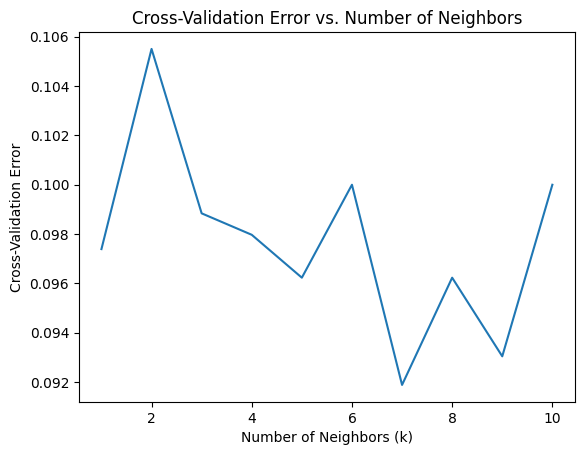

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore")

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from ucimlrepo import fetch_ucirepo


# Load the dataset into a DataFrame
spambase = fetch_ucirepo(id=94)

X = pd.DataFrame(spambase.data.features)
y = pd.DataFrame(spambase.data.targets)


# Preprocess the data
scaler = StandardScaler()
X_normalized_values = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized_values, columns=X.columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Select k using cross-validation
k_values = range(1, 11)  # Range of k values to evaluate
cv_errors = []  # List to store cross-validation errors for each k

for k in k_values:
    # Initialize kNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation to compute average error
    cv_error = 1 - np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy'))
    cv_errors.append(cv_error)

# Select the value of k that minimizes the average cross-validation error
optimal_k = k_values[np.argmin(cv_errors)]

# Train the kNN model using the selected k value on the entire training dataset
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = knn.predict(X_train)

# Evaluate the model's performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Print evaluation metrics for training data
print("Evaluation metrics for training data:")
print(f"Accuracy: {train_accuracy:.3f}")
print(f"Precision: {train_precision:.3f}")
print(f"Recall: {train_recall:.3f}")
print(f"F1 Score: {train_f1:.3f}")
print()

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's performance on the testing data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics for testing data
print("Evaluation metrics for testing data:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print()

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (test data):")
print(conf_matrix)


# Visualize the average cross-validation errors for different k values
plt.plot(k_values, cv_errors)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Error')
plt.title('Cross-Validation Error vs. Number of Neighbors')
plt.show()